In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

In [28]:
iot_df = pd.read_csv("ML-EdgeIIoT-dataset.csv")

C:\Users\ISURU\AppData\Local\Temp\ipykernel_22444\3490549484.py:1: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  iot_df = pd.read_csv("ML-EdgeIIoT-dataset.csv")


In [3]:
iot_df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


In [4]:
iot_df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


In [5]:
iot_df.shape

(157800, 63)

In [6]:
iot_df.isnull().sum()

frame.time            0
ip.src_host           0
ip.dst_host           0
arp.dst.proto_ipv4    0
arp.opcode            0
                     ..
mbtcp.len             0
mbtcp.trans_id        0
mbtcp.unit_id         0
Attack_label          0
Attack_type           0
Length: 63, dtype: int64

In [29]:
iot_df.describe()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,...,mqtt.len,mqtt.msg_decoded_as,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label
count,157800.000000,157800.000000,157800.000000,157800.000000,1.578000e+05,157800.0,157800.000000,157800.000000,157800.0,1.578000e+05,...,157800.000000,157800.0,157800.000000,157800.000000,157800.000000,157800.000000,157800.0,157800.0,157800.0,157800.000000
mean,0.014195,0.059848,3047.291838,3239.979778,4.046816e+04,0.0,14.715520,0.045748,0.0,7.160039e+07,...,0.419341,0.0,0.161331,0.031686,0.189506,0.031686,0.0,0.0,0.0,0.846001
std,0.149783,0.596245,11144.328203,11406.072994,1.764075e+06,0.0,229.659671,0.208938,0.0,3.101231e+08,...,3.606594,0.0,1.293453,0.354598,2.124206,0.354598,0.0,0.0,0.0,0.360949
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000e+00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000e+00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,1.000000e+00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,4.790000e+02,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,2.000000,6.000000,65532.000000,65524.000000,7.728902e+07,0.0,83655.000000,1.000000,0.0,2.147333e+09,...,39.000000,0.0,14.000000,4.000000,24.000000,4.000000,0.0,0.0,0.0,1.000000


In [31]:
iot_df["arp.dst.proto_ipv4"]=iot_df["arp.dst.proto_ipv4"].values.astype('str')
iot_df["arp.src.proto_ipv4"]=iot_df["arp.src.proto_ipv4"].values.astype('str')
iot_df["http.file_data"]=iot_df["http.file_data"].values.astype('str')
iot_df["http.request.uri.query"]=iot_df["http.request.uri.query"].values.astype('str')
iot_df["http.request.method"]=iot_df["http.request.method"].values.astype('str')
iot_df["http.referer"]=iot_df["http.referer"].values.astype('str')
iot_df["http.request.full_uri"]=iot_df["http.request.full_uri"].values.astype('str')
iot_df["http.request.version"]=iot_df["http.request.version"].values.astype('str')
iot_df['tcp.options'] = iot_df['tcp.options'].values.astype('str')
iot_df['tcp.payload'] = iot_df['tcp.payload'].values.astype('str')
iot_df['tcp.srcport'] = iot_df['tcp.srcport'].values.astype('str')
iot_df['dns.qry.name.len'] = iot_df['dns.qry.name.len'].values.astype('str')
iot_df['mqtt.conack.flags'] = iot_df['mqtt.conack.flags'].values.astype('str')
iot_df['mqtt.msg'] = iot_df['mqtt.msg'].values.astype('str')
iot_df['mqtt.protoname'] = iot_df['mqtt.protoname'].values.astype('str')
iot_df['mqtt.topic'] = iot_df['mqtt.topic'].values.astype('str')

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Convert categorical variable to numerical using LabelEncoder
label_encoder = LabelEncoder()
iot_df['ip.src_host'] = label_encoder.fit_transform(iot_df['ip.src_host'])
iot_df['ip.dst_host'] = label_encoder.fit_transform(iot_df['ip.dst_host'])
iot_df['arp.dst.proto_ipv4'] = label_encoder.fit_transform(iot_df['arp.dst.proto_ipv4'])
iot_df['arp.src.proto_ipv4'] = label_encoder.fit_transform(iot_df['arp.src.proto_ipv4'])
iot_df['http.file_data'] = label_encoder.fit_transform(iot_df['http.file_data'])
iot_df['http.request.uri.query'] = label_encoder.fit_transform(iot_df['http.request.uri.query'])
iot_df['http.request.method'] = label_encoder.fit_transform(iot_df['http.request.method'])
iot_df['http.referer'] = label_encoder.fit_transform(iot_df['http.referer'])
iot_df['http.request.full_uri'] = label_encoder.fit_transform(iot_df['http.request.full_uri'])
iot_df['http.request.version'] = label_encoder.fit_transform(iot_df['http.request.version'])
iot_df['tcp.options'] = label_encoder.fit_transform(iot_df['tcp.options'])
iot_df['tcp.payload'] = label_encoder.fit_transform(iot_df['tcp.payload'])
iot_df['tcp.srcport'] = label_encoder.fit_transform(iot_df['tcp.srcport'])
iot_df['dns.qry.name.len'] = label_encoder.fit_transform(iot_df['dns.qry.name.len'])
iot_df['mqtt.conack.flags'] = label_encoder.fit_transform(iot_df['mqtt.conack.flags'])
iot_df['mqtt.msg'] = label_encoder.fit_transform(iot_df['mqtt.msg'])
iot_df['mqtt.protoname'] = label_encoder.fit_transform(iot_df['mqtt.protoname'])
iot_df['mqtt.topic'] = label_encoder.fit_transform(iot_df['mqtt.topic'])

In [33]:
iot_df['Attack_type'].unique()



array(['MITM', 'Fingerprinting', 'Ransomware', 'Uploading',
       'SQL_injection', 'DDoS_HTTP', 'DDoS_TCP', 'Password',
       'Port_Scanning', 'Vulnerability_scanner', 'Backdoor', 'XSS',
       'Normal', 'DDoS_UDP', 'DDoS_ICMP'], dtype=object)

In [34]:
iot_df['Attack_type'] = iot_df['Attack_type'].str.replace('DDoS_HTTP', 'DDoS')
iot_df['Attack_type'] = iot_df['Attack_type'].str.replace('DDoS_TCP', 'DDoS')
iot_df['Attack_type'] = iot_df['Attack_type'].str.replace('DDoS_UDP', 'DDoS')
iot_df['Attack_type'] = iot_df['Attack_type'].str.replace('DDoS_ICMP', 'DDoS')
iot_df['Attack_type'] = iot_df['Attack_type'].str.replace('XSS', 'Injection')
iot_df['Attack_type'] = iot_df['Attack_type'].str.replace('Password', 'Injection')
iot_df['Attack_type'] = iot_df['Attack_type'].str.replace('Ransomware', 'Malware')
iot_df['Attack_type'] = iot_df['Attack_type'].str.replace('Backdoor', 'Malware')
iot_df['Attack_type'] = iot_df['Attack_type'].str.replace('MITM', 'MITM')
iot_df['Attack_type'] = iot_df['Attack_type'].str.replace('Uploading', 'MITM')
iot_df['Attack_type'] = iot_df['Attack_type'].str.replace('SQL_injection', 'Info_Gathering')
iot_df['Attack_type'] = iot_df['Attack_type'].str.replace('Fingerprinting', 'Info_Gathering')
iot_df['Attack_type'] = iot_df['Attack_type'].str.replace('Port_Scanning', 'Info_Gathering')
iot_df['Attack_type'] = iot_df['Attack_type'].str.replace('Vulnerability_scanner', 'Info_Gathering')

In [35]:
iot_df['Attack_type'].unique()

array(['MITM', 'Info_Gathering', 'Malware', 'DDoS', 'Injection', 'Normal'],
      dtype=object)

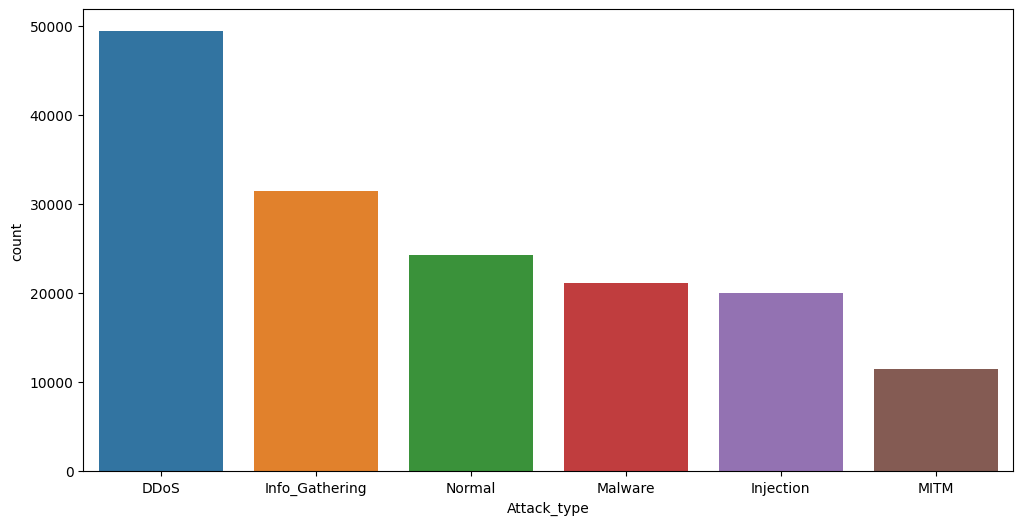

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='Attack_type', data=iot_df, order=iot_df['Attack_type'].value_counts().index);

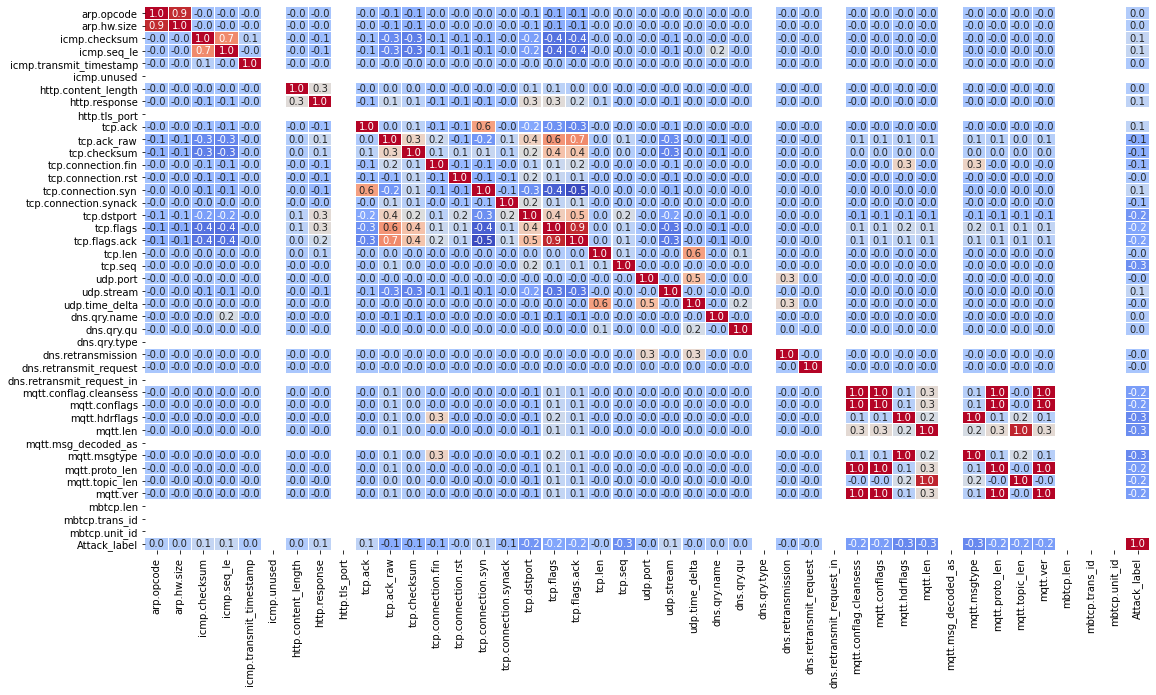

In [17]:
plt.figure(figsize=(18,10))
sns.heatmap(iot_df.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

In [36]:
from sklearn.utils import shuffle
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4",
"http.file_data","http.request.full_uri","icmp.transmit_timestamp",
"http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
"tcp.dstport", "udp.port", "mqtt.msg"]

In [37]:
iot_df.drop(drop_columns, axis=1, inplace=True)
iot_df.dropna(axis=0, how='any', inplace=True)
iot_df.drop_duplicates(subset=None, keep="first", inplace=True)
iot_df = shuffle(iot_df)
iot_df.isna().sum()
print(iot_df['Attack_type'].value_counts())
iot_df.info()

DDoS              48336
Info_Gathering    30115
Normal            24125
Malware           19548
Injection         19515
MITM              10572
Name: Attack_type, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 152211 entries, 43805 to 106212
Data columns (total 48 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   arp.opcode                 152211 non-null  float64
 1   arp.hw.size                152211 non-null  float64
 2   icmp.checksum              152211 non-null  float64
 3   icmp.seq_le                152211 non-null  float64
 4   icmp.unused                152211 non-null  float64
 5   http.content_length        152211 non-null  float64
 6   http.request.method        152211 non-null  int32  
 7   http.referer               152211 non-null  int32  
 8   http.request.version       152211 non-null  int32  
 9   http.response              152211 non-null  float64
 10  http.tls_port       

In [38]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [39]:
X = iot_df.drop('Attack_type', axis = 1).values
y = iot_df['Attack_type'].values.reshape(-1,1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (106547, 47)
Shape of X_test:  (45664, 47)


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
classifier_rf = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV


In [42]:
steps = [
('model', RandomForestClassifier())
]
rf_pipe = Pipeline(steps)
parameters = {
"model__n_estimators": [int(x) for x in np.linspace(start = 100, stop = 1100, num = 500)]
# "model__max_depth": np.linspace(10, 110, num = 22),
# "model__min_samples_split": [2, 5, 10],
# "model__min_samples_leaf": [1, 2, 4],
# "model__bootstrap": [True, False],
# "model__criterion": ["gini"],
# "model__random_state" : [42]
}



In [43]:
classifier_rf = RandomizedSearchCV(estimator = rf_pipe,
param_distributions = parameters,
n_iter = 100,
cv = 3,
random_state=42,
verbose = 4,
n_jobs = -1)

In [44]:
classifier_rf.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('model',
                                              RandomForestClassifier())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__n_estimators': [100, 102, 104,
                                                                106, 108, 110,
                                                                112, 114, 116,
                                                                118, 120, 122,
                                                                124, 126, 128,
                                                                130, 132, 134,
                                                                136, 138, 140,
                                                                142, 144, 146,
                                                                148, 150, 152,
                                                                154, 156, 158, ...]},
                   random_state=42, verbose=4)

In [45]:
y_pred_rf_train = classifier_rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)
y_pred_rf_test = classifier_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

Training set:  0.9989863628257952
Test set:  0.9310178696566223
